# **Day 73**
**Advanced - Aggregate & Merge Data with Pandas: Analyse the LEGO Dataset**

<h3><b> Introduction </b></h3>

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>


**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson. 

<img src="https://i.imgur.com/49FNOHj.jpg">

Place this URL in html img tag for above image: https://i.imgur.com/49FNOHj.jpg


**Import Statements**


In [76]:
import pandas as pd
import matplotlib.pyplot as plt

**Data Exploration**



**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.



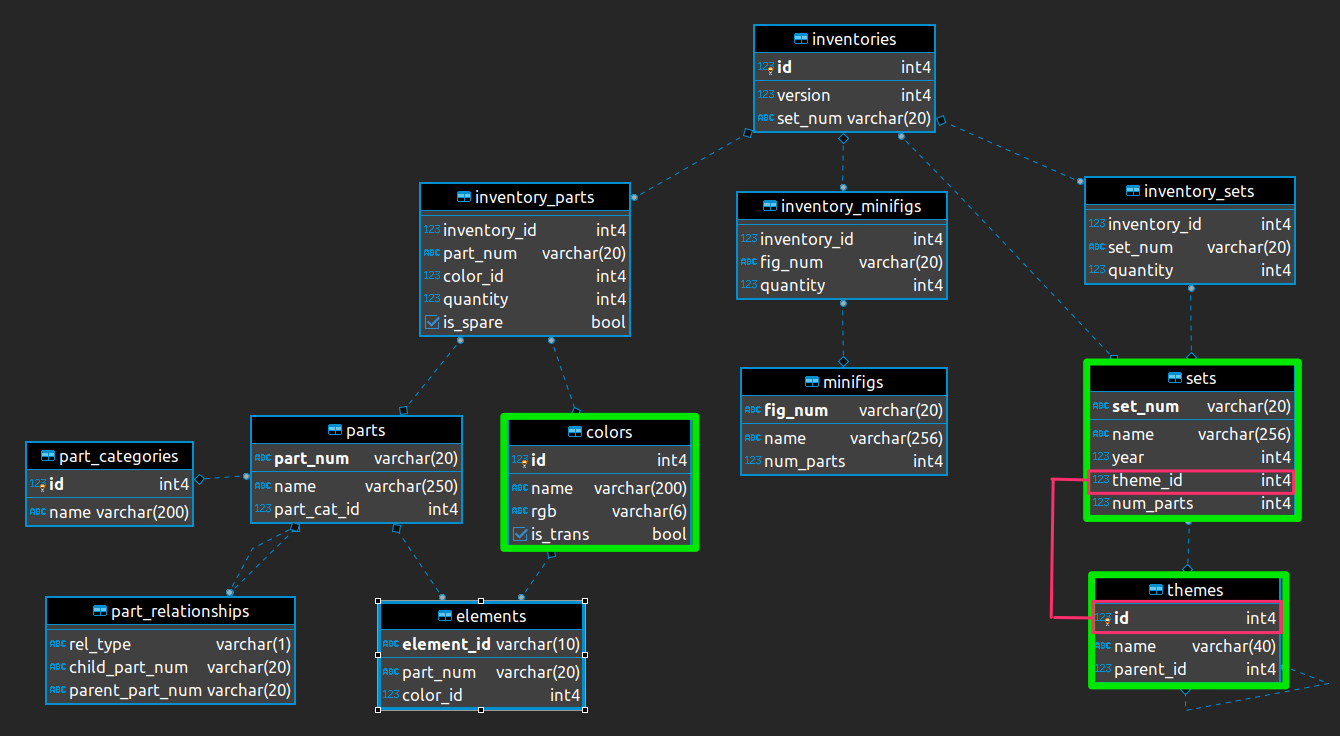

In [77]:
from IPython.display import Image
Image("/content/assets/rebrickable_schema.png")

In [78]:
colors_df = pd.read_csv("data/colors.csv", header=0, names=["id", "name", "rgb", "is_trans"])
print(f"Colors_df description:\n{colors_df.describe()}\n\nTop 5 rows of colors_df\n{colors_df.head()}\n\n")

print(f"Total number of unique colours in colors_df: {colors_df['name'].nunique()}\n")

'''Challenge: Find the number of transparent colours where is_trans == 't' versus the number of opaque colours where is_trans == 'f'. See if you can accomplish this in two different ways.'''
print(f"Total number of transparent colours in colors_df:\n{colors_df.groupby('is_trans').count()}\n")
print(f"Total number of colours in each category in colors_df:\n{colors_df.is_trans.value_counts()}\n")

'''Challenge: Change this into an h3 section heading: '''




Colors_df description:
                id
count   217.000000
mean    553.626728
std     792.697799
min      -1.000000
25%      71.000000
50%     313.000000
75%    1036.000000
max    9999.000000

Top 5 rows of colors_df
   id            name     rgb is_trans
0  -1       [Unknown]  0033B2        f
1   0           Black  05131D        f
2   1            Blue  0055BF        f
3   2           Green  237841        f
4   3  Dark Turquoise  008F9B        f


Total number of unique colours in colors_df: 217

Total number of transparent colours in colors_df:
           id  name  rgb
is_trans                
f         179   179  179
t          38    38   38

Total number of colours in each category in colors_df:
f    179
t     38
Name: is_trans, dtype: int64



'Challenge: Change this into an h3 section heading: '

<h3><b>Understanding LEGO Themes vs. LEGO Sets</b></h3>

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

**Challenge**: Display this image: https://i.imgur.com/aKcwkSx.png
<img src="https://i.imgur.com/aKcwkSx.png">

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

**Challenge:** Display this image https://i.imgur.com/whB1olq.png

<img src="https://i.imgur.com/whB1olq.png">

The sets.csv data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge:** Read the sets.csv data and take a look at the first and last couple of rows.

In [79]:
sets_df = pd.read_csv("data/sets.csv", header=0, names=["set_num", "name", "year", "theme_id", "num_parts"])
print(f"Sets_df description:\n{sets_df.describe()}\n\nTop 5 rows of sets_df\n{sets_df.head()}\n\nLast 5 rows of sets_df\n{sets_df.tail()}\n")

Sets_df description:
               year      theme_id     num_parts
count  19686.000000  19686.000000  19686.000000
mean    2006.811287    410.510363    161.143452
std       13.742592    196.796677    400.605680
min     1949.000000      1.000000      0.000000
25%     2001.000000    252.000000      5.000000
50%     2011.000000    494.000000     35.000000
75%     2017.000000    525.000000    145.000000
max     2022.000000    725.000000  11695.000000

Top 5 rows of sets_df
  set_num                        name  year  theme_id  num_parts
0   001-1                       Gears  1965         1         43
1  0011-2           Town Mini-Figures  1979        67         12
2  0011-3  Castle 2 for 1 Bonus Offer  1987       199          0
3  0012-1          Space Mini-Figures  1979       143         12
4  0013-1          Space Mini-Figures  1979       143         12

Last 5 rows of sets_df
           set_num                             name  year  theme_id  num_parts
19681      XWING-1             

**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [80]:
sets_df.sort_values("year").head()

,set_num,name,year,theme_id,num_parts
11884,700.B-1,Small Doors and Windows Set (ABB),1949,371,12
11873,700.2-1,Large Gift Set (ABB),1949,365,178
11883,700.A-1,Small Brick Set (ABB),1949,371,24
11860,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
11878,700.3-1,Medium Gift Set (ABB),1949,365,142


**Challenge**: How many different products did the LEGO company sell in their first year of operation?

In [81]:
sets_df[sets_df["year"]==1949]

,set_num,name,year,theme_id,num_parts
11860,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
11873,700.2-1,Large Gift Set (ABB),1949,365,178
11878,700.3-1,Medium Gift Set (ABB),1949,365,142
11883,700.A-1,Small Brick Set (ABB),1949,371,24
11884,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


**Challenge**: What are the top 5 LEGO sets with the most number of parts? 

In [82]:
sets_df.sort_values("num_parts", ascending=False).head()

,set_num,name,year,theme_id,num_parts
4025,31203-1,World Map,2021,709,11695
18571,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
369,10294-1,Titanic,2021,721,9092
350,10276-1,Colosseum,2020,721,9036
13708,75192-1,Millennium Falcon,2017,171,7541


**Challenge:** Use .groupby() and .count() to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019?

In [83]:
sets_by_year_df = sets_df.groupby("year").count()
sets_by_year_df["set_num"]

year
1949       5
1950       6
1953       4
1954      14
1955      29
        ... 
2018     882
2019     947
2020     965
2021    1097
2022     686
Name: set_num, Length: 72, dtype: int64

**Challenge:** Show the number of LEGO releases on a line chart using Matplotlib.

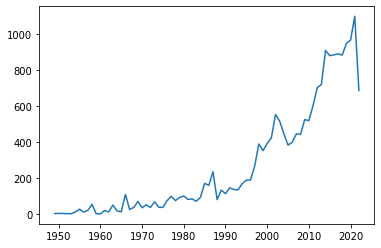

In [84]:
plt.plot(sets_by_year_df.index, sets_by_year_df.set_num)

If we don't exclude the current incomplete year we get a dramatic drop at the end of the chart. This is quite misleading as it suggests LEGO is in big trouble! 

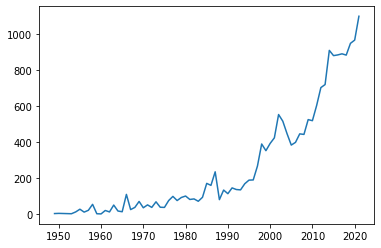

In [85]:
plt.plot(sets_by_year_df.index[:-1], sets_by_year_df.set_num[:-1])

**Adding styling to the graph**

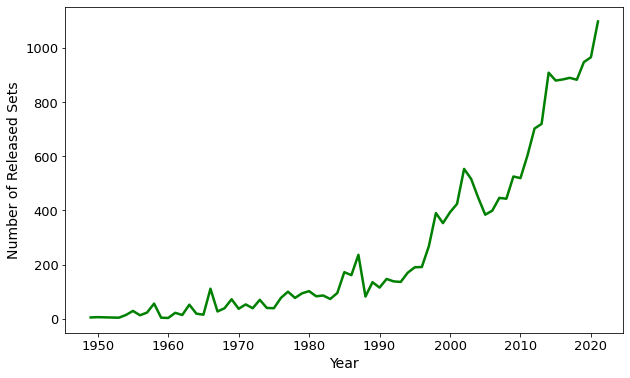

In [86]:
plt.figure(figsize=(10, 6))
plt.xticks(fontsize=13)
plt.xlabel("Year", fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel("Number of Released Sets", fontsize=14)
plt.plot(sets_by_year_df.index[:-1], sets_by_year_df["set_num"][:-1], color="green", linewidth=2.5)

<h3><b>Aggregate Data with the Python .agg() Function </b></h3>

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [87]:
themes_df = pd.read_csv("data/themes.csv",header=0, names=["id", "name", "parent_id"])
themes_df.head()

,id,name,parent_id
0,1,Technic,NaN
1,3,Competition,1.0
2,4,Expert Builder,1.0
3,16,RoboRiders,1.0
4,17,Speed Slammers,1.0


In [88]:
themes_by_year_df=sets_df.groupby("year").agg({"theme_id":pd.Series.nunique})
themes_by_year_df

,theme_id
year,
1949,2
1950,1
1953,2
1954,2
1955,4
...,...
2018,89
2019,77
2020,85


In [89]:
themes_by_year_df.rename(columns={'theme_id':'no_of_themes'}, inplace=True)
themes_by_year_df.head()

,no_of_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4


**Challenge:** Create a line plot of the number of themes released year-on-year. Only include the full calendar years in the dataset (1949 to 2022).

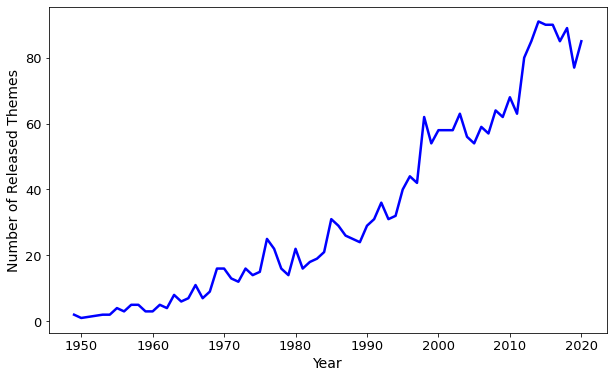

In [90]:
plt.figure(figsize=(10, 6))
plt.xticks(fontsize=13)
plt.xlabel("Year", fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel("Number of Released Themes", fontsize=14)
plt.plot(themes_by_year_df.index[:-2], themes_by_year_df["no_of_themes"][:-2], color="blue", linewidth=2.5)

<h3><b>Superimposing Line Charts with Separate Axes</b></h3>

Superimposing multiple line charts this way is not ideal

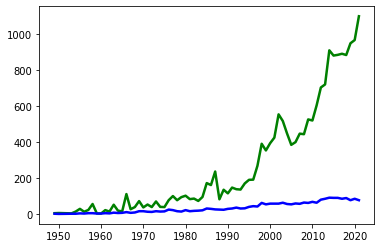

In [91]:
plt.plot(sets_by_year_df.index[:-1], sets_by_year_df["set_num"][:-1], color="green", linewidth=2.5)
plt.plot(themes_by_year_df.index[:-1], themes_by_year_df["no_of_themes"][:-1], color="blue", linewidth=2.5)

**Using two Separate Axes**

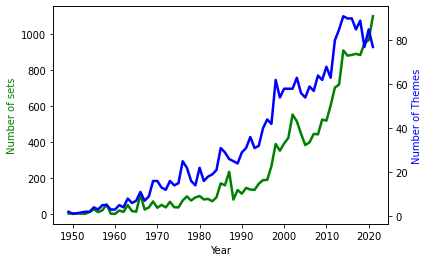

In [92]:
ax1 = plt.gca() # Get Current Axes
ax2 = ax1.twinx() # This method allows ax1 and ax2 to share the same x-axis

ax1.set_xlabel('Year')

ax1.set_ylabel('Number of sets', color='green')
ax1.plot(sets_by_year_df.index[:-1], sets_by_year_df["set_num"][:-1], color="green", linewidth=2.5)

ax2.set_ylabel('Number of Themes', color='blue')
ax2.plot(themes_by_year_df.index[:-1], themes_by_year_df["no_of_themes"][:-1], color="blue", linewidth=2.5)

**Challenge:** Use the .groupby() and .agg() function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [93]:
parts_per_set_df = sets_df.groupby("year").agg({"num_parts": pd.Series.mean})
parts_per_set_df.rename(columns={"num_parts": "avg_no_of_parts"}, inplace =True)
parts_per_set_df

,avg_no_of_parts
year,
1949,99.600000
1950,1.000000
1953,12.500000
1954,8.357143
1955,15.758621
...,...
2018,194.543084
2019,202.546990
2020,219.670466


<h3><b>Scatter Plots in Matplotlib</b></h3>

**Challenge:** Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the scatter plot documentation before I show you the solution. Do you spot a trend in the chart?

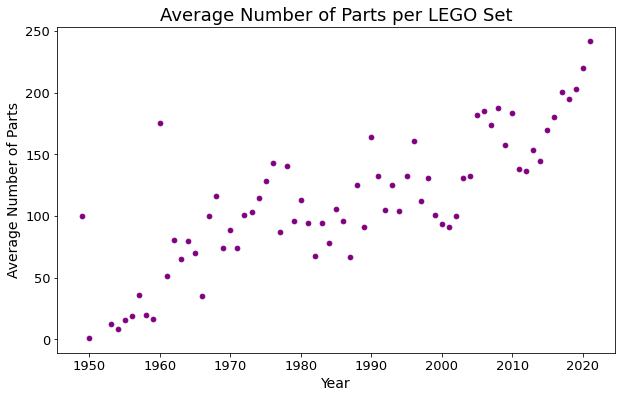

In [94]:
plt.figure(figsize=(10, 6))
plt.title("Average Number of Parts per LEGO Set", fontsize=18) 
plt.xticks(fontsize=13)
plt.xlabel("Year", fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel("Average Number of Parts", fontsize=14)
plt.scatter(parts_per_set_df.index[:-1], parts_per_set_df["avg_no_of_parts"][:-1], color="purple", s=22)

**Number of Sets per LEGO Theme**

In [95]:
set_theme_count_df = sets_df["theme_id"].value_counts()
# updating the set_theme_count dataframe with column titles 
set_theme_count_df = pd.DataFrame({"id": set_theme_count_df.index, "set_count": set_theme_count_df.values})
set_theme_count_df.head()

,id,set_count
0,501,2164
1,158,837
2,503,613
3,497,498
4,494,494


**Challenge:** Use what you know about HTML markup and tags to display the database schema: https://i.imgur.com/Sg4lcjx.png

<img src="https://i.imgur.com/Sg4lcjx.png"/>

<h3><b>Database Schemas, Foreign Keys and Merging DataFrames</b></h3>

The themes.csv file has the actual theme names. The sets .csv has theme_ids which link to the id column in the themes.csv.

**Challenge:** Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many ids correspond to this name in the themes.csv? Now use these ids and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the theme_id column)

In [96]:
# Start Wars theme
themes_df[themes_df["name"] == "Star Wars"]

,id,name,parent_id
5,18,Star Wars,1.0
75,158,Star Wars,NaN
97,209,Star Wars,207.0
127,261,Star Wars,258.0


In [97]:
# look up a particular id in the sets dataframe
sets_df[sets_df["theme_id"] == 209]

,set_num,name,year,theme_id,num_parts
13538,75023-1,Star Wars Advent Calendar 2013,2013,209,254
13571,75056-1,Star Wars Advent Calendar 2014,2014,209,275
13605,75097-1,Star Wars Advent Calendar 2015,2015,209,291
13656,75146-1,Star Wars Advent Calendar 2016,2016,209,282
13698,75184-1,Star Wars Advent Calendar 2017,2017,209,309
13731,75213-1,Star Wars Advent Calendar 2018,2018,209,307
13770,75245-1,Star Wars Advent Calendar 2019,2019,209,280
13806,75279-1,Star Wars Advent Calendar 2020,2020,209,311
13832,75307-1,Star Wars Advent Calendar 2021,2021,209,336
13868,75340-1,Star Wars Advent Calender 2022,2022,209,0


<h3><b>Merging (i.e., Combining) DataFrames based on a Key</b></h3>

In [98]:
# merging dataframes on the "id" column
merged_df = pd.merge(set_theme_count_df, themes_df, on="id")
merged_df.head()

,id,set_count,name,parent_id
0,501,2164,Gear,NaN
1,158,837,Star Wars,NaN
2,503,613,Key Chain,501.0
3,497,498,Books,NaN
4,494,494,Friends,NaN


**Creating bar chart**

<BarContainer object of 10 artists>

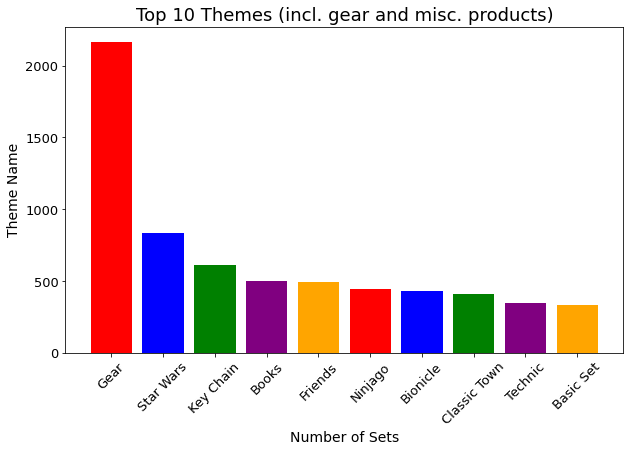

In [99]:
# bar chart of top 10 themes
plt.figure(figsize=(10, 6))
# seems to include several other "non-theme" bars too
plt.title("Top 10 Themes (incl. gear and misc. products)", fontsize=18) 
# rotate the text to make it readable
plt.xticks(fontsize=13, rotation=45)
plt.xlabel("Number of Sets", fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel("Theme Name", fontsize=14)
# list of colors to use, no particular meaning for their order
colors = ["red", "blue", "green", "purple", "orange", "red", "blue", "green", "purple", "orange"]
# only show the first 10
plt.bar(merged_df["name"][:10], merged_df["set_count"][:10], color=colors)